# 多样本数据模型

## Kruskal-Wallis秩和检验

如果我们知道单样本方差分析中那个总体方差是多少，其实我们就可以回避F检验里通过比消掉那个方差的麻烦，
更不用去证明那个麻烦的两个平方和独立的结论。

$$
\frac{1}{\sigma^2} \sum_{i=1}^k n_i(\bar{x}_i - \bar{x})^2 \sim \chi^2(k-1)
$$

在Cochran 的notebook里的讨论我们还发现了$n_i$的决定性用处，虽然没加也是$k-1$秩。但只有加权之后，
我们惊讶的发现$\frac{\sqrt{n_i}}{\sigma}(\bar{x}_i - \bar{x})$协方差矩阵直接变成了对称幂等矩阵，这就直接得到了卡方分布。

在秩的方法里，我们完全照搬上述思路。构造统计量

$$
H = \frac{1}{\sigma^2}\sum_{i=1}^k n_i (\bar{R}_i - \bar{R})^2 = 
\frac{12}{N(N+1)}\sum_{i=1}^k n_i (\bar{R}_i - \bar{R})^2
$$

但是各个秩$R_j$显然不是独立正态分布的，虽然各个分组秩均值$\bar{R}_i$单独看应该是渐进正态分布的，但它们应该是不独立的。
这就使得讨论变得非常麻烦。我们来试验一下是否秩的取值方式可以让它们渐进独立。



In [40]:
mean.rank <- function(cuts = c(10,20,30,40),size = 1000){ 
    #cuts <- c(10,20,30,40)
    n <- sum(cuts)
    #size <- 1000
    obsl <- c()
    for(i in 1:size){
        permu <- sample(1:n)
        head <- 1
        obs <- c()
        for(len in cuts){
            obs <- c(obs, mean(permu[head:(head+len-1)]))
            head <- head + len 
        }
        obsl <- rbind(obsl, obs)
    }
    return(obsl)
}

In [41]:
cor(mean.rank(c(10,20,30,40)))

1.0000000,-0.1600879,-0.1837223,-0.2964687
-0.1600879,1.0000000,-0.2953396,-0.4272494
-0.1837223,-0.2953396,1.0000000,-0.5516162
-0.2964687,-0.4272494,-0.5516162,1.0000000


In [44]:
cor(mean.rank(c(10,20,30,40)*10))

1.0000000,-0.1991246,-0.2240489,-0.2247874
-0.1991246,1.0000000,-0.2946999,-0.3938685
-0.2240489,-0.2946999,1.0000000,-0.5831481
-0.2247874,-0.3938685,-0.5831481,1.0000000


In [45]:
cor(mean.rank(c(10,20,30,40)*100))

1.0000000,-0.1523421,-0.1896773,-0.3576632
-0.1523421,1.0000000,-0.3496109,-0.4133972
-0.1896773,-0.3496109,1.0000000,-0.4785979
-0.3576632,-0.4133972,-0.4785979,1.0000000


可以看出，各分组平均秩和随规模增长并没有渐进独立的趋势，这就导致在这个步骤归约到常规的方差分析那种形式的尝试失败了。
为了证明上述统计量的确渐进服从$\chi^2(k-1)$分布，得借助其他方法。

事实上我又没想出来，参照陈希儒的《非参数统计教程》P115和P155的内容，可以作出如下说明。

设$n$为总样本规模，$m$为分组数。则对分组$k \in 1,...,m$而言的线性秩和统计量定义为：

$$
L_{nk} = \sum_{i=1}^n c_{ni}^{(k)} a_n(R_i), \quad k = 1,...,m
$$

其中$R_i$是第$i$个观测的秩，$a_n$是记分函数。$c_{ni}^{(k)}$是第$k$组给记分$a_n(R_i)$的加权，经常会给本组以外的数赋0，本组赋1，
这种情况中使用加权记法是为了简化符号。不然要写成那种恶心的分割$n_k$的记法。

符合某些正则条件情况下（大致就是加权和记分不“发散”之类的）。若以下极限都存在

$$
\lim_{n \to \infty} 
\frac{
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )(c_{ni}^{(l)} - \bar{c}_n^{(l)} )
}
{
\sqrt{
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )^2  \sum_{i=1}^n (c_{ni}^{(l)} - \bar{c}_n^{(l)} )^2 
}
}
= \lambda_{kl}
$$

将这些极限做成矩阵$\Lambda = (\lambda_{kl})_k$

则有，

$$
\begin{bmatrix}
\frac{L_{n1} - E(L_{n1})}{\sigma_{n1}} \\
... \\
\frac{L_{nm} - E(L_{nm})}{\sigma_{nm}}  
\end{bmatrix}
\to
N(0,\Lambda)
$$

注意$\Lambda$并不是对角矩阵，这里做的是保相关的标准化。

极限中$c_{mi}^{(k)}$相当于一个三元函数，每个$n$对应一个不同的三元函数。这个极限反映了这个三元函数的某些性质，
也就是具体对每个整体样本规模$n$，$m$个分组是怎么划分的（加权的）。

如果我们设极限

$$
\frac{n_i}{n} \to p_i  > 0 \quad i = 1,2,...,m
$$

则极限分式上半部分可得到

$$
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )(c_{ni}^{(l)} - \bar{c}_n^{(l)} ) = 
(n-n_l-n_k) p_k p_l + n_k (1 - p_k)(-p_l) + n_l(-p_k)(1 - p_l) = n p_k p_l - n_k p_l - n_l p_k = 
\frac{n_k n_l}{n} - \frac{n_k n_l}{n} - \frac{n_k n_l}{n} = -\frac{n_k n_l}{n}
$$

下半部分可依次得到

$$
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )^2 =
n_k (1 - p_k)^2 + (n - n_k)p_k^2
$$

$$
n_k - 2 p_k n_k + n p_k^2 = n_k - 2\frac{n_k^2}{n} + \frac{n_k^2}{n} = n_k - \frac{n_k^2}{n} = n_k(1 - p_k)
$$


$$
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )^2  \sum_{i=1}^n (c_{ni}^{(l)} - \bar{c}_n^{(l)} )^2  =
n_k(1 - p_k) n_l (1 - p_l)
$$

于是

$$
\lambda_{kl} = 
\frac{
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )(c_{ni}^{(l)} - \bar{c}_n^{(l)} )
}
{
\sqrt{
\sum_{i=1}^n (c_{ni}^{(k)} - \bar{c}_n^{(k)} )^2  \sum_{i=1}^n (c_{ni}^{(l)} - \bar{c}_n^{(l)} )^2 
}
}
=
\frac{
-\frac{n_k n_l}{n}
}
{
\sqrt{n_k(1 - p_k) n_l (1 - p_l)}
}
=
-\sqrt{ \frac{p_k p_l}{(1 - p_k)(1 - p_l)} }
\quad
k \neq l \\
\lambda_{kk} = 1
$$

这样可以定义出$m \times m$的矩阵$\Lambda$，然而它不可逆，我们转而只选取它的左上角的$m-1 \times m-1$子矩阵作为矩阵$\Lambda$。
当然只这么做并不能证明它可逆，我们发现可以通过直接凭空构造一个逆矩阵使其乘积为$m-1$级单位阵来证明这一点。

构造
$$
\Lambda^{-1} 
=
\begin{bmatrix}
1 - p_1 & 0     & \cdots & 0 \\
0     & 1 - p_2 & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots \\
0     & 0     & \cdots & 1 - p_{m-1}
\end{bmatrix}
+
dd^T / p_m
$$

其中
$$
d=(\sqrt{p_1(1-p_1)},...,\sqrt{p_{m-1}(1-p_{m-1}}))^T
$$

可以计算证明其的确为$\Lambda$的逆矩阵。

看上去是完全机械的运算，就是不验证了（好吧我开个头后去吃了个饭，再回来就不想算了）。这里有趣的是线性约束是如何起作用的，
我们那是协方差矩阵秩与去相关标准化。它这是。。。利用约束中导出的$x_m = a_1 x_1 + ...$式关系直接消掉了$x_m$，
然后只用$x_1,...,x_{m-1}$折腾。由于那个关系的存在，想要它出现时候就构造出表达式把它代回来就是。只有$m-1$的表达式去证明
它服从$m-1$自由度的卡方分布显然更自然。

既然$\Lambda^{-1}$的确是$\Lambda$的逆矩阵。我们就可以直接做$(x_1,...,x_{m-1})\Lambda^{-1}(x_1,...,x_{m-1})^T \sim \chi^2(m-1)$。
这是具有满秩的协方差矩阵的随机向量的特权。展开二次型$(x_1,...,x_{m-1})\Lambda^{-1}(x_1,...,x_{m-1})^T $的表达式，我们可以从中
代回$x_m$，然后凑成某个看的上眼的统计量形式，然后我们就自然得到该统计量服从$\chi^2(m-1)$。比如抽象的$T_n$统计量。

$$
T_n = \frac{n-1}{D_n} \sum_{i=1}^m n_i (L_{n_i}/n_i - \bar{a}_n)^2 \sim \chi^2(m-1)
$$

在取记分函数取恒等映射$a_n(r) = r$，即直接的秩和时，我们得到Kruskal-Wallis统计量与卡方分布的关系。

$$
H = T_n = \frac{12}{n(n+1)} \sum_{i=1}^m n_i (R_i - \frac{n+1}{2})^2 \sim \chi^2(m-1)
$$

从这个证明中我们得到了一个套路，因为满秩协方差矩阵的随机向量可以自然地服从卡方分布。
对于有不满秩（自由度小于变量数）的协方差矩阵的随机向量。我们可以先取其极大线性无关组，自然地论证其与卡方分布后再经过线性组合关系
把之前失踪的变量代回来，凑成所有变量都出现的形式。如果所证命题真的正确，就一定凑的出来。

虽然没有必要，但也可以得到对称于方差分析的F检验的$F^*$统计量。

$$
F^* = \frac{ \sum_{i=1}^m n_i(\bar{x}_i - \bar{x})^2 / (k-1) }
{ \sum_{i=1}^m \sum_{j=\sum_{k=1}^{m-1} n_k + 1}^{\sum_{k=1}^{m} n_k} (x_j - \bar{x}_i)^2  / (n-k)}
\sim F(n-1,n-k)
$$

KW统计量的精确分布可以采用置换检验的思想，可以定义为遍历每个排列，每个排列对应一个统计量值与一个相同的概率。再合并起来就得到了精确分布。
虽然这么定义比较直观，但复杂度感人。我们也可以在第一组中构成所有可能组合，再在第二组中构成残余元素所有组合。。这样。

In [1]:
3**14

[1] 4782969

In [4]:
prod(1:14)

[1] 87178291200

In [5]:
prod(10:14)/prod(1:5) * prod(5:9) / prod(1:5) * prod(1:4) /prod(1:4)

[1] 252252

In [209]:
pierce <- function(x, n){
    
    if(length(x)==n){
        return(matrix(x,1,length(x)))
    }
    if(n == 1){
        return(matrix(x,length(x),1))
    }
        
    rm <- NULL
    for(i in 1:(length(x)-n+1)){
        cbinded <- cbind(x[i],pierce(x[(i+1):length(x)],n-1))
        rm <- rbind(rm, cbinded)
    }
    return(rm)
}

In [216]:
pierce(c(1,2,3,4),3)

1,2,3
1,2,4
1,3,4
2,3,4


In [220]:
pierce(c(1,2,3,4,5,6),1)

1
2
3
4
5
6


In [197]:
group <- function(x, nk){
    if(length(nk)==1){
        return(matrix(x,1,length(x)))
    }
    self.res <- NULL
    perm.mat <- pierce(1:length(x),nk[1])
    #print(perm.mat)
    for(i in 1:nrow(perm.mat)){
        #cat('x',x,'nk',nk,'i',i,'select',x[perm.mat[i,]],'res.select',x[-perm.mat[i,]],'\n')
        group.res <- group(x[-perm.mat[i,]],nk[2:length(nk)])
        left.matrix <- matrix(rep(x[perm.mat[i,]],nrow(group.res)),nrow(group.res),nk[1],byrow=TRUE)
        self.res <- rbind(self.res, cbind(left.matrix,group.res))
    }
    return(self.res)
}

In [210]:
group(c(1,2,3,4),c(2,2))

1,2,3,4
1,3,2,4
1,4,2,3
2,3,1,4
2,4,1,3
3,4,1,2


In [211]:
mat <- group(1:6,c(2,2,2))

head(mat)

1,2,3,4,5,6
1,2,3,5,4,6
1,2,3,6,4,5
1,2,4,5,3,6
1,2,4,6,3,5
1,2,5,6,3,4


In [201]:
6*5/2 * 4*3/2

[1] 90

In [214]:
nrow(mat)

[1] 90

In [221]:
seq(10,60,10)

[1] 10 20 30 40 50 60

In [223]:
head(group(seq(10,60,10),c(2,2,2)))

10,20,30,40,50,60
10,20,30,50,40,60
10,20,30,60,40,50
10,20,40,50,30,60
10,20,40,60,30,50
10,20,50,60,30,40


In [224]:
mat2 <- group(1:14,c(5,5,4)) # It cost 10+ second to run. Terriable efficiency ,shamed.

In [225]:
nrow(mat2)

[1] 252252

In [309]:
S.H.1 <- function(data,nk){
    #n <- sum(nk)
    #mean.R <- (n+1)/2
    head <- 1
    res <- NULL
    for(k in nk){
        res <- cbind(res, apply(data[,head:(head+k-1)],1,mean))
        head <- head + k
    }
    return(res)
}

S.H.2 <- function(means,nk){
    n <- sum(nk)
    mean.R <- (n+1)/2
    H <- apply((means - mean.R)**2 %*% diag(nk),1,sum) * (12/(n*(n+1)))
    return(H)
}

S.H <- function(data,nk){
    means <- S.H.1(data,nk)
    return(S.H.2(means,nk))
}

In [230]:
mat3 <- S.H.1(mat2,c(5,5,4))

In [234]:
apply(mat3,2,mean)

[1] 7.5 7.5 7.5

In [235]:
apply(mat3,2,median)

[1] 7.5 7.5 7.5

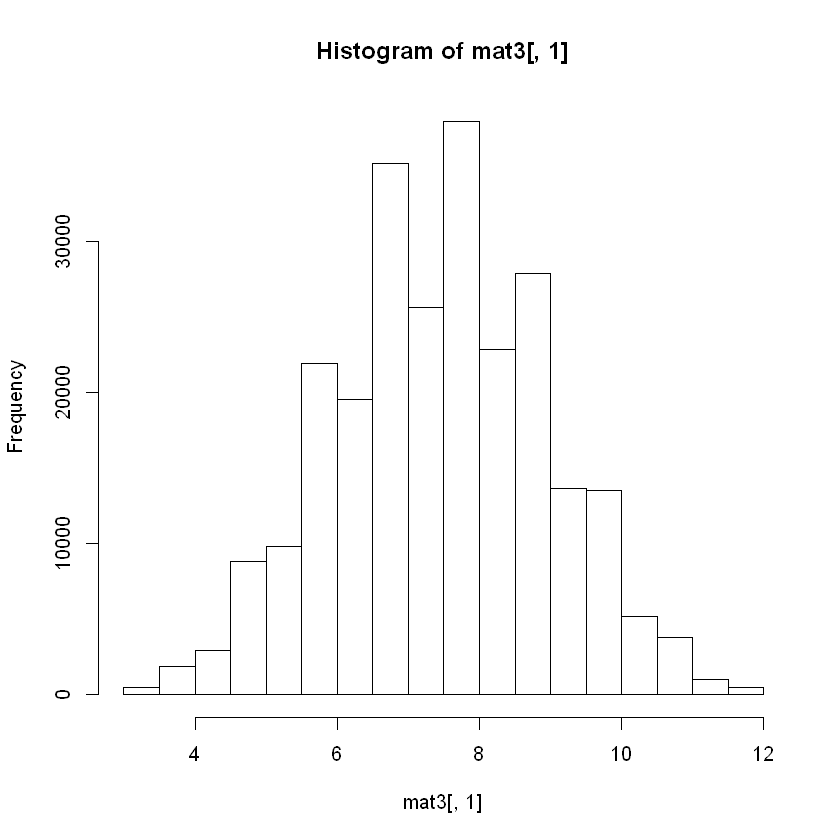

In [236]:
hist(mat3[,1])

In [237]:
cov(mat3)

2.250009,-1.250005,-1.250005
-1.250005,2.250009,-1.250005
-1.250005,-1.250005,3.125012


In [310]:
mat4 <- S.H.2(mat3,c(5,5,4))

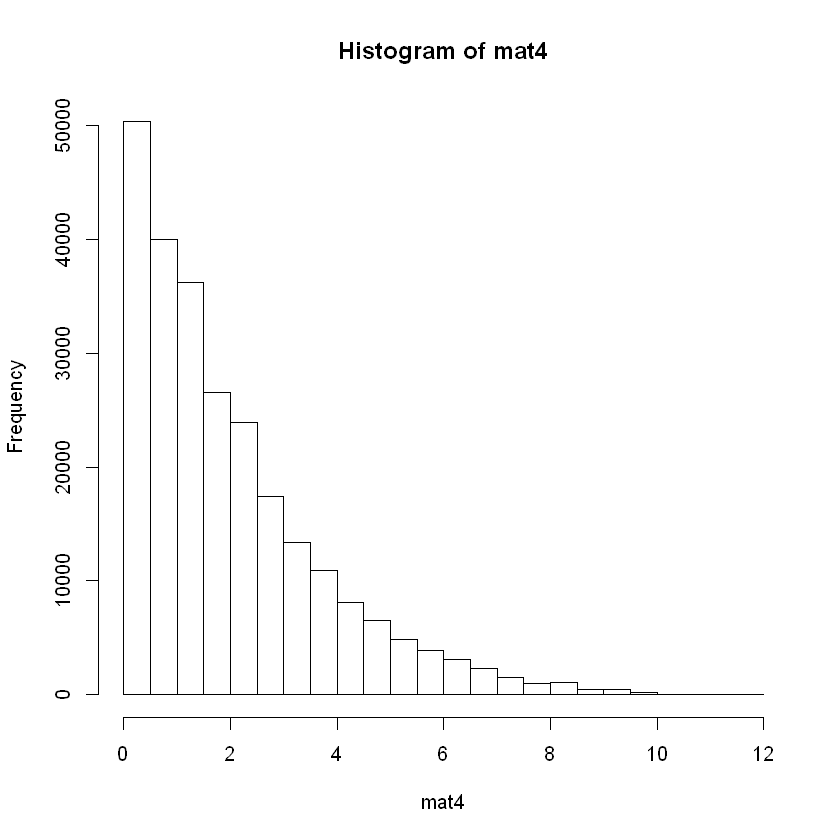

In [311]:
hist(mat4)

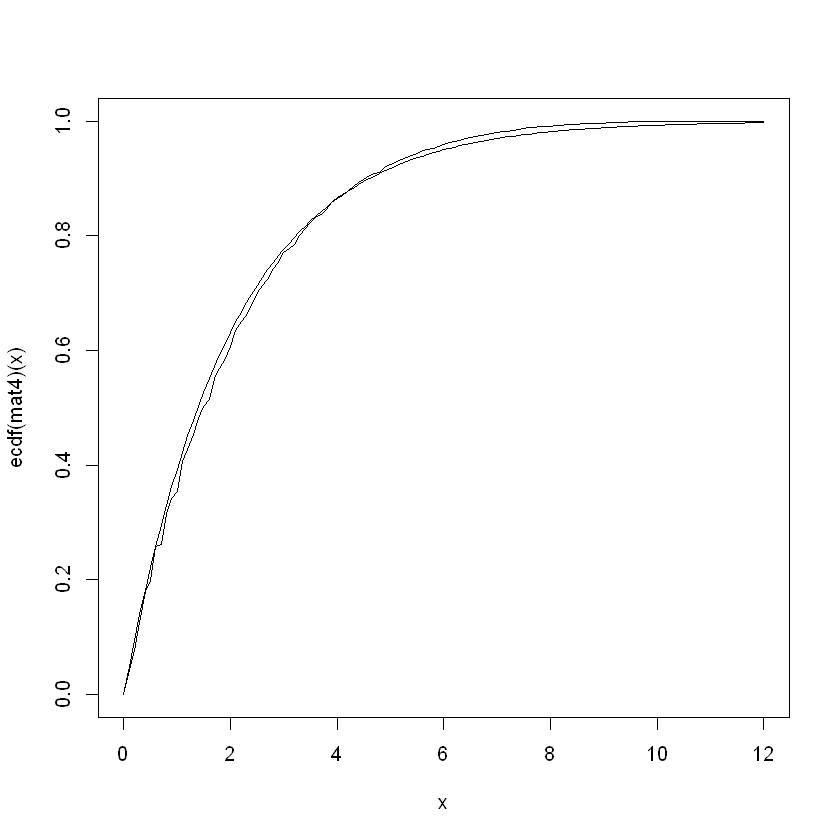

In [318]:
x <- seq(0,12,0.1)

plot(x,ecdf(mat4)(x),'l')


y <- pchisq(x,2)

lines(x,y,type="l")

可以看出精确分布的确与渐进的卡方分布十分接近。

In [3]:
wtloss <- c(3.7, 3.7, 3.0, 3.9, 2.7, 
            7.3, 5.2, 5.3, 5.7, 6.5,
            9.0, 4.9, 7.1, 8.7)
wtloss.nk <- c(5,5,4)

In [322]:
sh <- S.H(rbind(rank(wtloss),rank(wtloss)),wtloss.nk) # fuck the auto simplify
sh

[1] 9.411429 9.411429

In [323]:
H <- sh[1]
H

[1] 9.411429

In [324]:
pchisq(H,2,lower.tail=FALSE)

[1] 0.009043452

In [325]:
1-ecdf(mat4)(H)

[1] 0.001157573

In [331]:
kruskal.test(wtloss,rep(1:length(wtloss.nk),wtloss.nk))


	Kruskal-Wallis rank sum test

data:  wtloss and rep(1:length(wtloss.nk), wtloss.nk)
Kruskal-Wallis chi-squared = 9.4322, df = 2, p-value = 0.00895


In [329]:
rep(1:length(wtloss.nk),wtloss.nk)

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3

In [333]:
1-ecdf(mat4)(H-0.01)

[1] 0.001347858

和书上结果正好差在自变量上0.01?也许是ecdf或书上暗中做了某些处理导致不一致。之前可能也是因为这个，总之大体一致。

## 正态记分检验

$$
T = (n-1) \frac{
\sum_{i=1}^k (\frac{1}{n_i}(\sum_{j=1}^{n_i} \omega_{ij}^2)  )
}
{
\sum_{i=1}^k \sum_{j=1}^{n_i} \omega_{ij}^2
}
\to
\chi^2(k-1)
$$

其中

$$
\omega_{ij} = \Phi^{-1} (\frac{r_{ij}}{n+1})
$$

是为正态记分。

In [4]:
normal.score <- function(r){
    n <- length(r)
    return(qnorm(r/(n+1)))
}

omega <- normal.score(rank(wtloss))
omega

[1] -0.72791329 -0.72791329 -1.11077162 -0.43072730 -1.50108595  0.84162123
 [7] -0.08365173  0.08365173  0.25334710  0.43072730  1.50108595 -0.25334710
[13]  0.62292572  1.11077162

In [336]:
rank(wtloss)

[1]  3.5  3.5  2.0  5.0  1.0 12.0  7.0  8.0  9.0 10.0 14.0  6.0 11.0 13.0

此处书上的处理方式是无视结，随便排了个序赋予秩，似乎不好，这将导致不唯一的结果。

In [6]:
wtloss.group <- rep(1:3,wtloss.nk)
wtloss.group

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3

In [16]:
tapply(wtloss,wtloss.group,mean)

1     2     3 
3.400 6.000 7.425

In [26]:
n <- sum(wtloss.nk)

In [29]:
T <- (n-1) * sum(tapply(omega,wtloss.group,sum)**2 * (1/wtloss.nk)) / (sum(omega**2))
T

[1] 9.078947

In [30]:
pchisq(T,2,lower.tail=FALSE)

[1] 0.01067903

## Jonckheere-Terpstra检验

比较其Kruskal-Wallis检验，Jonckheere-Terpstra检验把备择假设空间约束到了一个单调递增的方向。

$$
\begin{align}
H_0 &: \theta_1 = \cdots = \theta_k \\
H_1 &: \theta_1 \le \cdots \le \theta_k \quad \text{(There exist a $\lt$ in sequence)}
\end{align}
$$

撤销部分备择假设空间后，可以把那部分参数成立下检验统计量集中而留下那部分不集中的区域划给接受域，把更接近留下部分转给接受区域。
这种变化就带来剩下的备择假设空间上的功效函数值上升，至少不会下降，因为如果所有改变都带来下降，至少可以根本不改变。

当然这是即使检验统计量和以前一样就能得到的结果，事实上，一般来说我们可以选择更优的检验统计量。为此设

$$
U_{ij} = \#(X_{ik} < X_{jl} ,\; k = 1,\ldots,n_i,\, l=1,\ldots ,n_j),
$$

为样本$i$与样本$j$的笛卡尔积中，满足左边小于右边关系的对数。

Jonckheere-Terpstra统计量就是把所有满足$i<j$的样本对对应的$U_{ij}$相加。或者可以看成$U$矩阵所有对角线右上的元素相加。

$$
J = \sum_{i<j} U_{ij}
$$

其原假设成立下的分布显然也可以用类似上面Kruskal-Wallis的方法导出精确分布，也容易看出更加麻烦了。大样本下可以得到正态近似

$$
E(J) = (N^2 - \sum_{i=1}^k n_i^2)/4 \\
Var(J) = N^2(2N+3) - \sum_{i=1}^k n_i^2 (2n_i + 3)/72 \\
Z = \frac{J - E(Z)}{\sqrt{Var(J)}} \to N(0,1)
$$

在原假设成立下也应该有对角线是$n_k(n_k-1)/2$，对角线上两边元素倾向于分布均衡，如果备择假设空间包含小于或大于，
我们要考虑某侧对角线上的元素小或大。要是包含一些其他的非单调情况，则会出现那种情况和原假设的统计量分布无法分辨的情况。
那种情况虽然定性上看与单调情况不应该有什么区别，但在那些参数点却有着很低的功效，而且这种点非常多。
这时我们发现根本不应该用Jonckheere-Terpstra统计量，因为换用其他能分辨出那些参数的统计量可以取得更高的功效。
虽然在单调的参数上可能略降一些，但如果我们真是想设定那种备择假设，
就应该弃用Jonckheere-Terpstra统计量而改用Kruskal-Wallis统计量之类的。正如如果真的把备择假设设为单调的，
就应该舍弃Kruskal-Wallis统计量选用Jonckheere-Terpstra统计量来达到严格更优的功效。

使用JT统计量的一个特点是，因为有很多与原假设几乎完全混淆却又完全不一样的非单调参数赋值，所以从那些（大量）的情况中为真时，
我们都在以比如95%错误率作出决定。比如说，把$U$矩阵分成四份，我们发现右上的右和上部分一个很大，另一个很小，但加和后就貌似符合原假设了。

In [31]:
wtloss

[1] 3.7 3.7 3.0 3.9 2.7 7.3 5.2 5.3 5.7 6.5 9.0 4.9 7.1 8.7

In [32]:
table(wtloss)

wtloss
2.7   3 3.7 3.9 4.9 5.2 5.3 5.7 6.5 7.1 7.3 8.7   9 
  1   1   2   1   1   1   1   1   1   1   1   1   1 

In [109]:
fission <- function(dat, index){
    # c(1,2,3,4,5,6),c(1,1,1,2,2,3) -> list(c(1,2,3), c(4,5), c(6))
    dic <- list()
    for(i in 1:length(dat)){
        if(is.null(dic[index[i]][[1]])){
            dic[[index[i]]] <- dat[i]
        }
        else{
            dic[[index[i]]] <- c(dic[[index[i]]],dat[i])
        }
    }
    return(dic)
}

U.mat <- function(pop.list){
    # list(c(1,2,3), c(4,5), c(6)) -> [3,6,3; 0,1,2; 0,0,0]
    k <- length(pop.list)
    mat <- matrix(nrow = 3, ncol = 3)
    for(i in 1:k){
        for(j in 1:k){
            mat[i,j] <- sum(outer(pop.list[[i]],pop.list[[j]],'-') < 0)
        }
    }
    return(mat)
}

J.stat <- function(H){
    # [3,6,3; 0,1,2; 0,0,0] -> 6+3+2=11
    r <- 0
    k <- ncol(H)
    for(i in 1:(k-1)){
        for(j in (i+1):k){
            r <- r + H[i,j]
        }
    }
    return(r)
}

Z.score <- function(J,nk){
    N <- sum(nk)
    EJ <- (N^2 - sum(nk^2))/4
    VarJ <- (N^2 * (2 * N + 3) - sum(nk^2 * (2 * nk + 3)))/72
    Z <- (J - EJ)/sqrt(VarJ)
    return(Z)
}

In [78]:
dic <- fission(wtloss,rep(c(1,2,3),wtloss.nk))
dic

[[1]]
[1] 3.7 3.7 3.0 3.9 2.7

[[2]]
[1] 7.3 5.2 5.3 5.7 6.5

[[3]]
[1] 9.0 4.9 7.1 8.7

In [80]:
sum(outer(dic[[1]],dic[[2]],'-') < 0)

[1] 25

In [86]:
U.mat(dic)

9,25,20
0,10,14
0,6,6


这里$U_{11}=9$而不是$10$是因为第一个样本存在打结。

In [108]:
J <- J.stat(U.mat(dic))
J

[1] 59

In [113]:
Z <- Z.score(J,wtloss.nk)
Z

[1] 3.103362

In [114]:
pnorm(Z,lower.tail=FALSE)

[1] 0.0009566765

功效比前面的检验不知道高到哪里去了，当然，这是备择假设空间缩减的效果，
试想我们把备择假设空间退缩到到什么$\theta_1 = \ldots = \theta_{k-1} = 0,\theta_{k} = 1000000$这样的单点集上。自然很容易就可以拒绝。
而且我们发现一个问题，此时拒绝了原假设，也并不代表备择假设就多真了，说不定还是原假设更接近真实情况一些
（最大似然的情况现在既不在原假设空间也不在备择假设空间）。当然，原假设和备择假设空间一般是出于外生的目的而决定的，
假设检验干的事就是选择检验统计量和划分检验统计量拒绝域来使得满足给定显著性水平基础上使得势函数在备择假设空间上的值最大化。
不过这里显著性水平一般却是一个灵活的概念，因为假设检验的统计量和划分方法对于各个$\alpha$给出的原则是一致的，增大减小只不过是
拒绝域的一些单调大小变化而已。反倒经常是知道p值（如果p值有恰当定义）后再去选显著性水平。

在$k=3$时，备择假设空间充满了$R^3$除了原假设占据的直线外的所有点。收缩到$\theta_1 < \theta_2 < \theta_3$后，
就成了$R^3$空间3个平面划分8块中的一块。我们可以先考察新的备择假设空间上各个假设成立时对应统计量的分布
(对非参数而言可能要指定背后分布，不过直观上也可以随便举一个，因为一般对所有背后分布我们感兴趣的定性性质都一致)，
这也可以通过数字特征如期望来看，这时和看势函数有类似之处。观察到备择假设空间上相对原假设空间上统计量（主要是集中趋势）的不同之处后，
我们再划分拒绝域，整出势函数。

## 区组设计回顾

将因素分为处理(treatment)和区组(block)是应用的需要。并没有什么理由禁止我们倒换两因素的“处理”和“区组”的地位。
说到底，我们相当于在做一个关于模型中部分参数的假设检验，假设对参数约束的不完全性使得我们失去了以往的全部同分布的便利性。
在无重复因素双因素方差分析中，原假设相当于假设各个“区组”因素对应的总体是不一样的，
区组里本来经过不同处理的观测被看做同分布（每个“区组”一个分布）的。显然，如果区组和处理都有“影响”，
则每个格的分布一般都是不同的。这里的部分假设相当于废掉了部分变异性。

于是在此原假设成立下，对每个处理的在所有区组的观测的平均也是同分布的，这个平均是在几个出自不同的总体的随机变量间平均，
和平时那个的平均不一样。但因为所有处理的这个平均所平均的那几个总体都是对应一样的且数量一致（这种情况都是1个），
所以处理的平均就是同分布的，相应的，区组的对应平均就是普通的平均，且各均值间本来就应该不集中，因为没有假设约束它们位置一致。

当然这是原假设的确成立的情况，假如处理还是有影响，则各从处理计算的均值就会产生明显的偏离，这可以以处理均值与总均值
（原假设成立时总均值可以看成是同分布的处理均值的均值，或对其期望更准确地估计）的差的平方和表示。偏离比较大时，
该平方和的集中位置也会比较大。

在正态假设下，那种单观测双因素表那样的小样本也可以由正态分布的性质得到各个处理均值服从正态分布，
从而可以标准化做成$\chi^2$统计量，如果不知道方差再进一步做成$F$统计量。如果表很大的话，均值会处理会渐进正态分布，
此时各分组什么形状就不重要了，但方差应该一样（因为标准化无论如何都会用到方差或协方差），
如果不一样还要处理就应该事先调整尺度把它们变成一样的。这就是无交互效应的双因素方差分析。

每个格单观测容易推导到多观测情况（但各格观测数还得是相同的），显然处理方式没什么差别。另一个扩展方式是可以缺一些格的方式，
用这个方法好像不好理解，可能看成回归更好。而在多因素下，被我们假设为没有效应的那个因素的“轴”上的元素看成是其他因素笛卡尔积的样本，
样本内看做是同一分布的，样本间看成是一般不同分布的，可照搬前面思路构造统计量。对处理因素的各个多因素区组的各个观测取平均之类的。
而且这么看的话各格的观测数好像也不一定需要是相同的，这样看处理均值到底是什么样子的。
另外其他因素笛卡尔积没有利用方差分析给定的线性假设的简化，这一简化在双因素时没有体现出来。这一简化在允许使用的分布上产生了一些约束，
上面提到的搞法有点非参数的感觉。

不完全区组设计貌似可以试图放处理的平均值，然后规约为之前的问题。

不完全区组设计的BIBD（Balanced Incomplete Block Design）以$BIBD(k,b,r,t,\lambda)$编码一个设计。
其中$k$为试验矩阵的行数,$b$为试验矩阵的列数。$r_i$为$i$行的和，若都相同就记为$r$，$t_j$为$j$列和，若都相同则记为$t$。
$\lambda_{ij}$是第$i,j$行同时为1的次数，或者说两行构成的向量内积的和。

BIBD试验矩阵的一个例子如

$$
\begin{bmatrix}
0 & 1 & 1 & 1 \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
1 & 1 & 1 & 0
\end{bmatrix}
$$

其中各行看成各个处理，各列看成各个区组。上面是$BIBD(4,4,3,3,2)$的一个实例。令其为$M$，$M_{12}=1$表示第一个处理在第二区组中进行一次试验。
其余类推。

## Friedman 秩和检验

$$
Q = \frac{12}{bk(k+1)}\sum_{i=1}^k (R_i - \frac{b(k+1)}{2})^2
$$

其中$R_i=\sum_{j=1}^b R_{ij}$，而$R_{ij}$为格$ij$上的观测在区组$.j$上的秩。也就是分组的不同位置性被内部计算秩给控制成了相对标准化的秩。

显然，以处理计算的秩和$R_i$结合了本处理在各个分组上对位置影响的信息。如果像原假设假设的那样没有影响的话，则按分组区分总体，
可以看成分组内出自同一个分布，这个时候若按分组求平均，则情况看上去类似Kruskal-Wallis统计量在它的原假设成立下的情况，
然而却并不是，KW统计量的格的秩是把所有样本混合的结果，而Friedman秩和的格的秩是区组内部计算的，显然区组算出的秩的位置要比
KW统计量的小，这一点被$\bar{R}$比$\frac{b(k+1)}{2}$大所调整过来。
然而我们实际是按处理求秩和，为什么不按分组求平均秩呢？

看起来其实秩和才是本体，前面那是因为各个分组的样本数不一样，为了标准化才求的平均，再重加权。
当然这里如果真写成均值再重加权也会得到一样的结果，只不过它的权都是一样的就连平均的那个分母一起提出来放到最外面当系数了，就是那个$b$。

注意各区间独立，组内同分布，导出的组内的格上的秩统计量在组内并不是独立的，（某列第一格取1秩了，该列其他格就不能取1秩）。
各组间的秩统计量依然独立，但是却并不能得到按行看与按列看是同分布的结论，显然一行可以取秩为$1,1,\ldots,1$而按列看却不能。
但是根据对称性，按行看的确是同分布的，但不独立，于是按处理计的秩和或平均秩也是同分布但不独立的。
当然Kruskal-Wallis统计量在各分组的平均秩之间也是这种同分布但不独立的情况，
但我们依然可以通过一些复杂的论证发现这些相关可以在近似正态和卡方分布上可以与独立得到相同的结果，
虽然它们本身并不独立，就像KW统计量上发生的一样，它们只是计算格秩和秩和，平均秩的方式有些区别，带来它们做的标准化略有区别，
但最后结果都是一样的。

$$
Q \to \chi^2_{k-1}
$$

In [1]:
data.frame(treatment = c('A','A','A','A','B','B','B','B','C','C','C','C'),
           block = c)

function (x = character(), levels, labels = levels, exclude = NA, 
    ordered = is.ordered(x), nmax = NA) 
{
    if (is.null(x)) 
        x <- character()
    nx <- names(x)
    if (missing(levels)) {
        y <- unique(x, nmax = nmax)
        ind <- sort.list(y)
        y <- as.character(y)
        levels <- unique(y[ind])
    }
    force(ordered)
    exclude <- as.vector(exclude, typeof(x))
    x <- as.character(x)
    levels <- levels[is.na(match(levels, exclude))]
    f <- match(x, levels)
    if (!is.null(nx)) 
        names(f) <- nx
    nl <- length(labels)
    nL <- length(levels)
    if (!any(nl == c(1L, nL))) 
        stop(gettextf("invalid 'labels'; length %d should be 1 or %d", 
            nl, nL), domain = NA)
    levels(f) <- if (nl == nL) 
        as.character(labels)
    else paste0(labels, seq_along(levels))
    class(f) <- c(if (ordered) "ordered", "factor")
    f
}
<bytecode: 0x000000001a4bd798>
<environment: namespace:base>